In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
df_red = pd.read_csv('winequality-red.csv', sep=";")

## Predicting Wine Quality

Linear Regression

In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (Assuming the dataset is a CSV file)
# df = pd.read_csv('your_wine_dataset.csv')

# Split features and target variable
X = df_red.drop('quality', axis=1)  # Replace 'quality' with the actual column name for wine quality
y = df_red['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.39002514396395416
Mean Absolute Error (MAE): 0.5035304415524376
R-squared (R²): 0.4031803412796231


Random Forest Approach

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split dataset into features and target variable
X = df_red.drop('quality', axis=1)
y = df_red['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.30123812499999997
Mean Absolute Error (MAE): 0.4224375
R-squared (R²): 0.5390429623873638


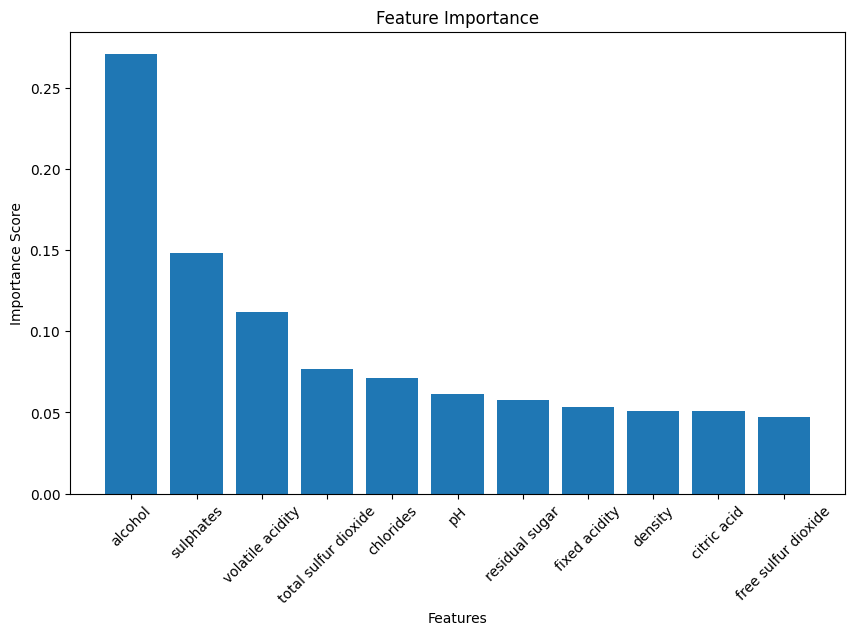

In [41]:
# For Random Forest or Gradient Boosting
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = rf_model.feature_importances_  # or gb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


XGboost

In [42]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.37378586833430416
Mean Absolute Error (MAE): 0.4891947314143181
R-squared (R²): 0.42802977561950684


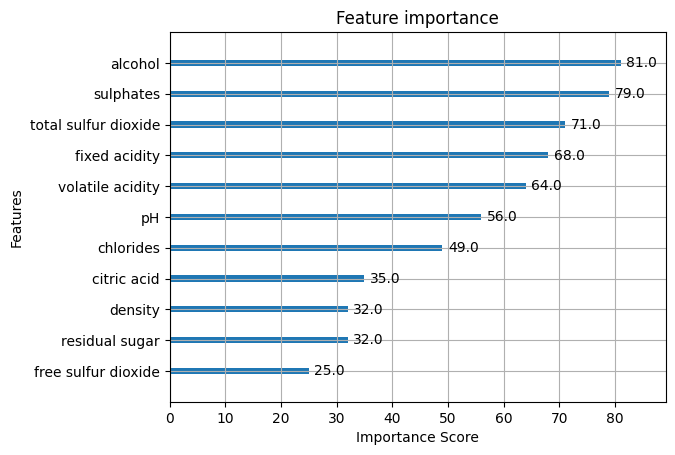

In [43]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_model, importance_type='weight', xlabel='Importance Score')
plt.show()


## Feature Impact on Quality

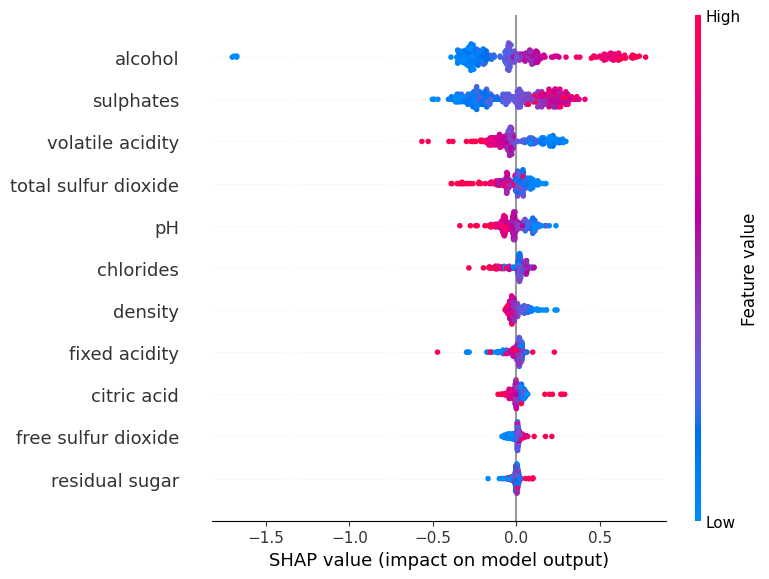

In [44]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model, X_train)  # Use your trained model and data
shap_values = explainer(X_test)

# Convert shap_values to a NumPy array for compatibility
shap_values_array = shap_values.values

# SHAP summary plot: Shows the direction and magnitude of impact
shap.summary_plot(shap_values, X_test)

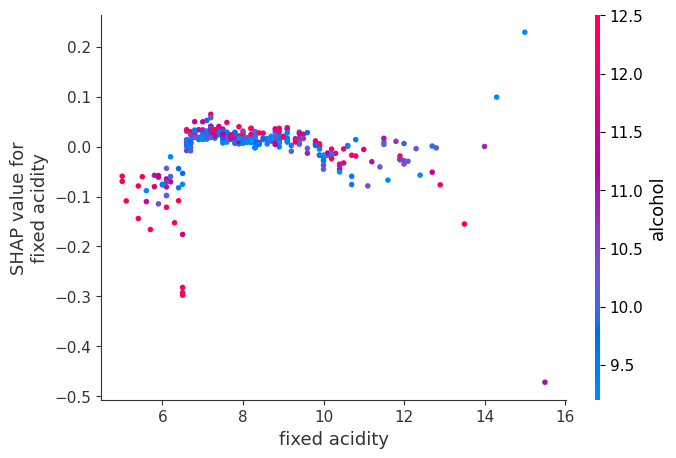

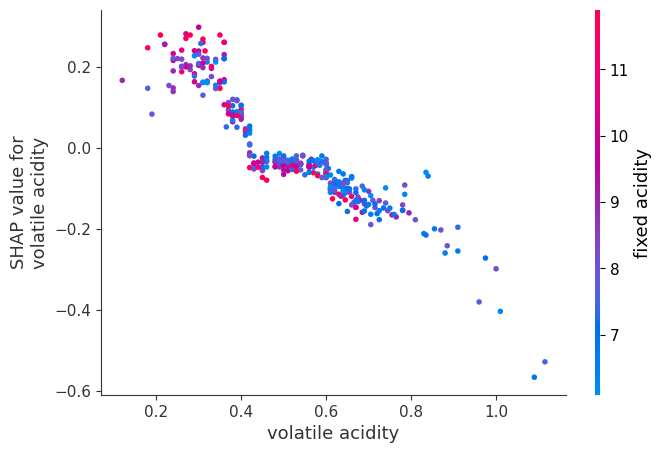

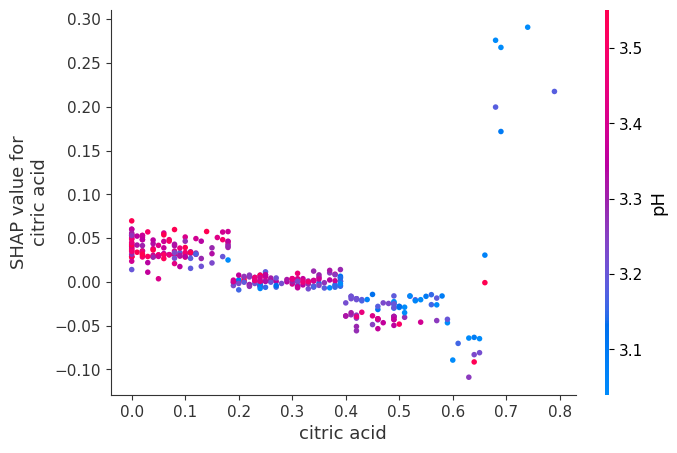

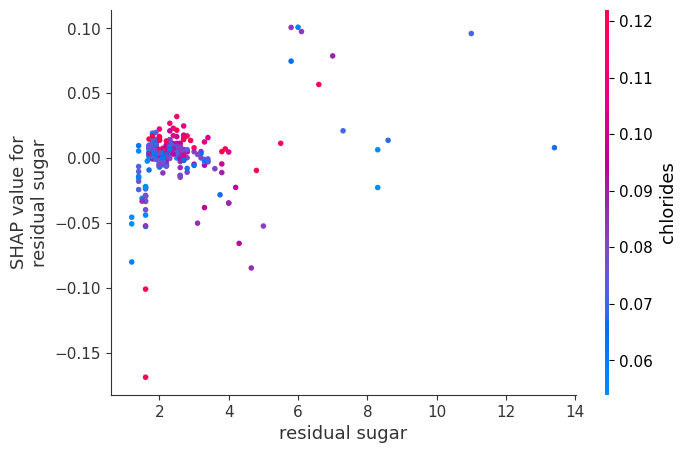

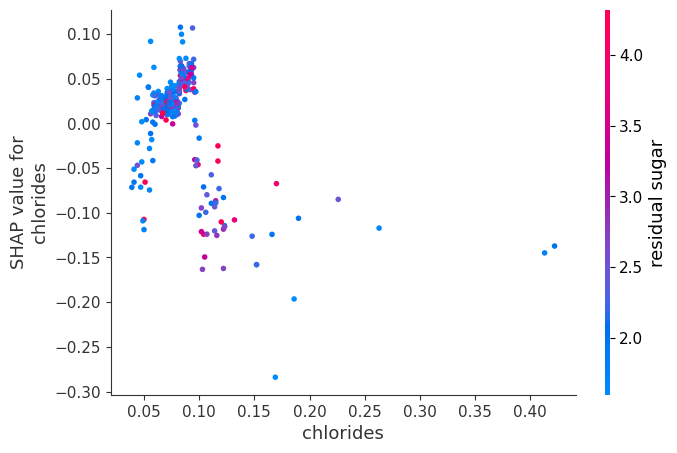

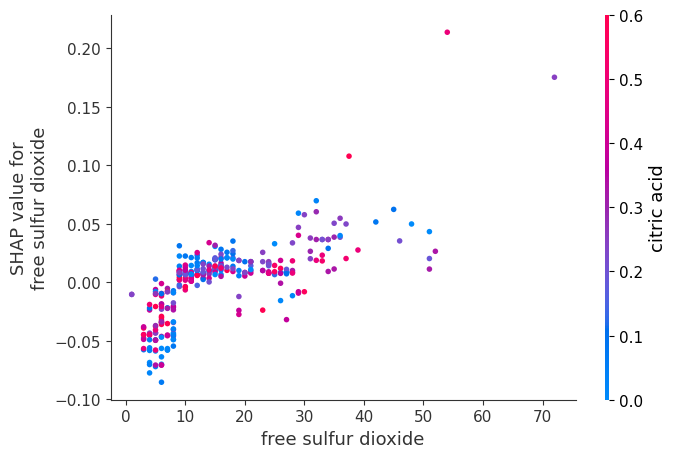

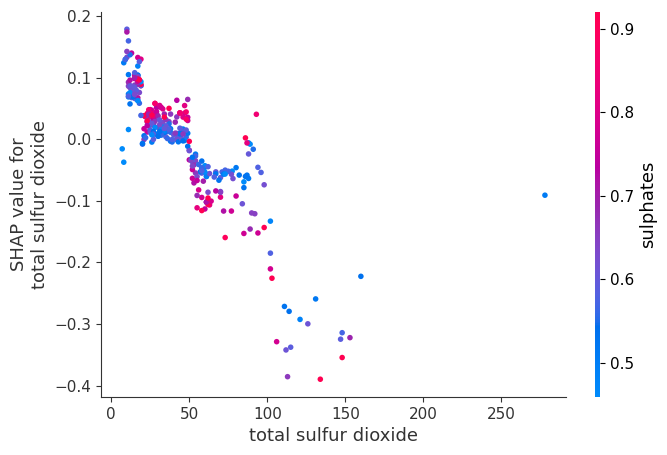

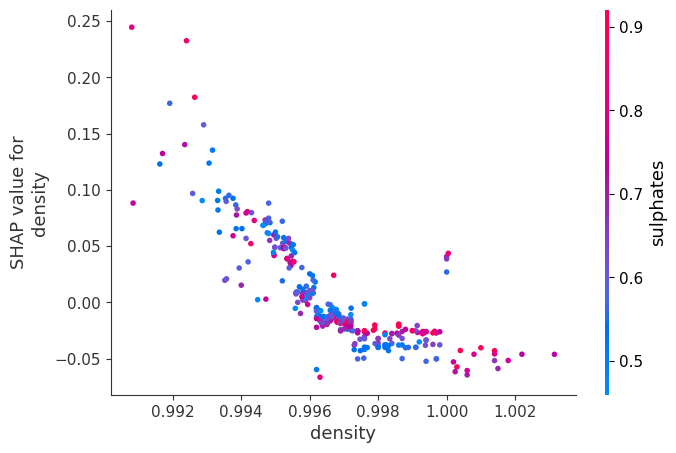

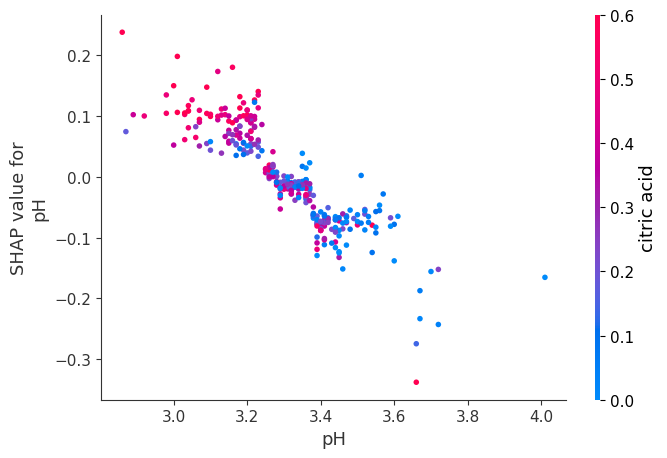

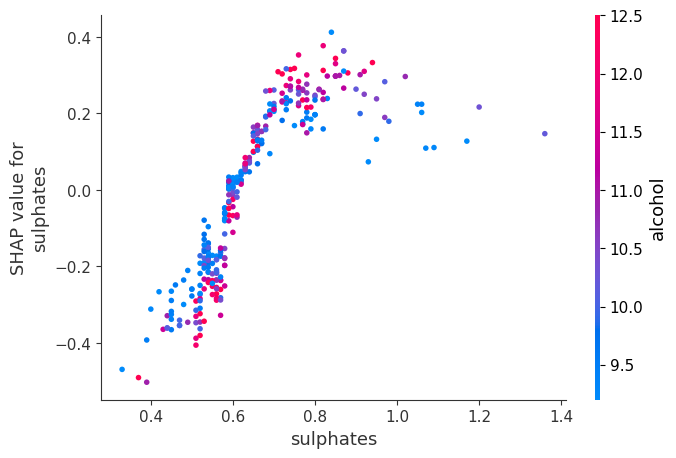

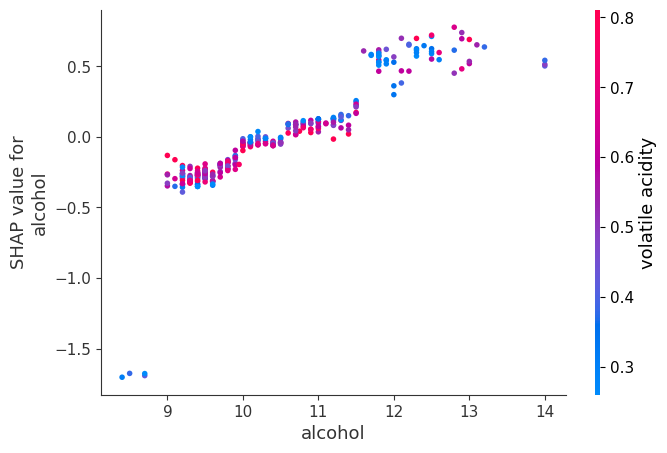

In [45]:
# Plot SHAP dependence plots for each feature
for feature in X_train.columns:
    shap.dependence_plot(feature, shap_values_array, X_test)

Partial Dependence Plots

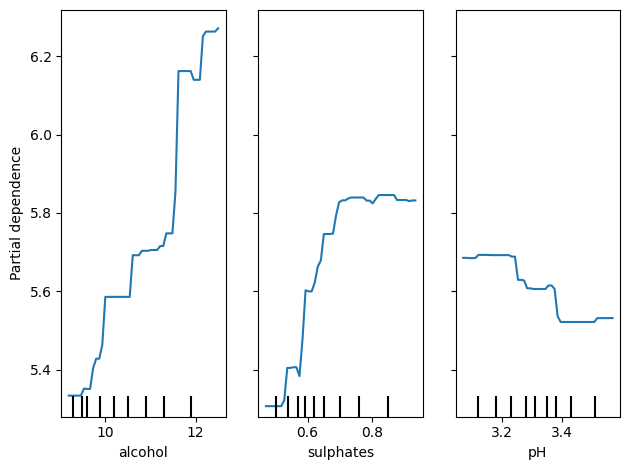

In [46]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot partial dependence for single or multiple features
PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['alcohol', 'sulphates', 'pH'], grid_resolution=50)

# Customize plot
plt.tight_layout()
plt.show()


Correlations

In [47]:
correlations = df_red.corr()['quality'].sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64
